In [51]:
from river import datasets
from river import metrics
from river import preprocessing
from river import compose
from river import evaluate
from river import ensemble
import pandas as pd
from river import tree
import numpy as np
import pandas as pd
from sklearn import tree as sktree
import graphviz

In [13]:
#load the dataset
data = pd.read_csv('Customer_Behaviour.csv')

In [15]:
# Print the columns
print(data.columns)


Index(['User_ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')


In [18]:
# Separate features and target variable
X = data.drop('Purchased', axis=1)
y = data['Purchased']

In [31]:
# Define the feature transformation pipeline
model = compose.Pipeline(
    ('scale', preprocessing.StandardScaler()),
    ('one_hot', preprocessing.OneHotEncoder())
)


In [37]:
# Create the Hoeffding Tree classifier
clf = tree.HoeffdingTreeClassifier()

In [39]:
# Create a metric to evaluate the model
metric = metrics.Accuracy()


In [44]:
print(f'Accuracy: {metric.get()}')


Accuracy: 0.0


In [47]:
# Create a metric to evaluate the model
metric = metrics.Accuracy()




In [48]:
# Train and evaluate the model
for _, row in X.iterrows():
    xi_transformed = model.transform_one(row)
    xi_dict = {col: val for col, val in xi_transformed.items()}
    yi = y.loc[row.name]
    clf.learn_one(xi_dict, yi)
    y_pred = clf.predict_one(xi_dict)
    metric.update(yi, y_pred)


In [49]:
# Print the accuracy score
accuracy = metric.get()
print(f'Accuracy: {accuracy}')

Accuracy: 0.6425


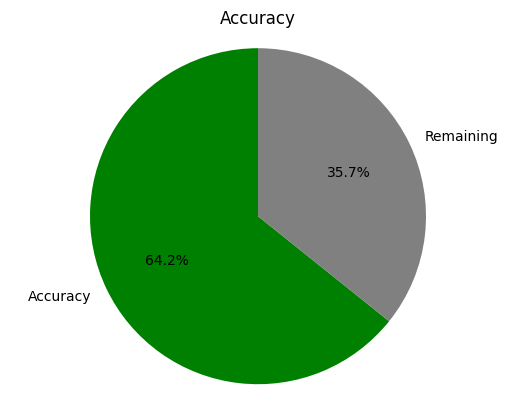

In [60]:
import matplotlib.pyplot as plt

# Accuracy value
accuracy = 64.25

# Create a list with accuracy and remaining percentage
accuracies = [accuracy, 100 - accuracy]

# Labels for each category
labels = ['Accuracy', 'Remaining']

# Colors for each category
colors = ['green', 'gray']

# Create the pie chart
plt.pie(accuracies, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Accuracy')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the pie chart
plt.show()


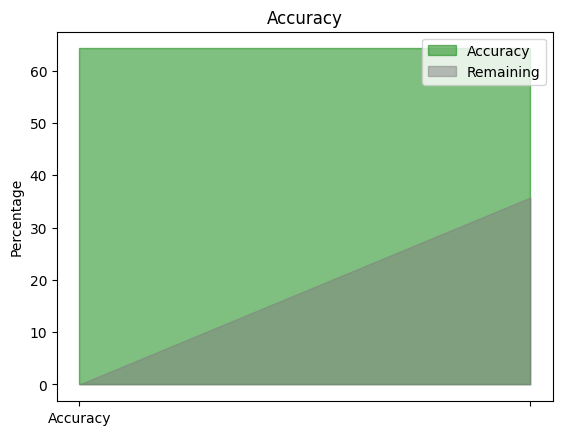

In [61]:
import matplotlib.pyplot as plt

# Accuracy value
accuracy = 64.25

# Calculate remaining percentage
remaining = 100 - accuracy

# Create x-axis values
x = [0, 1]

# Create y-axis values
y1 = [accuracy, accuracy]
y2 = [0, remaining]

# Create the area chart
plt.fill_between(x, y1, alpha=0.5, color='green', label='Accuracy')
plt.fill_between(x, y2, alpha=0.5, color='gray', label='Remaining')

# Set x-axis labels
plt.xticks(x, ['Accuracy', ''])

# Set y-axis label
plt.ylabel('Percentage')

# Add a title
plt.title('Accuracy')

# Display the legend
plt.legend()

# Display the area chart
plt.show()
